# Filtrado Morfológico en el Dominio de Fourier - Taller #2

###**Estudiante:** *Fredy Andres Castaño*
###**Materia:** *Procesamiento Digital de Imagenes*

Este notebook muestra cómo:
1. Descargar y extraer un ZIP de Google Drive con `gdown`.  
2. Cargar una imagen en escala de grises.  
3. Calcular su transformada de Fourier, visualizar espectro.  
4. Aplicar operaciones morfológicas (erosión y dilatación) sobre la magnitud.  
5. Reconstruir la imagen mediante la transformada inversa.  
6. Visualizar todos los pasos con títulos y descripciones.


## 1. Importación de bibliotecas y definición de rutas

In [1]:
import os
import zipfile
import gdown
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm
from skimage.morphology import rectangle, erosion, dilation
from skimage.io import imread

# Directorio donde quedó la imagen tras extraer
IMAGE_DIR = './images/'
IMAGE_FILE = 'moonlanding.png'

## 2. Función para descargar y extraer ZIP desde Google Drive

In [2]:
def load_and_extract_from_gdrive(file_id: str,
                                 zip_name: str = 'data.zip',
                                 extract_to: str = './'):
    """
    Descarga un archivo ZIP desde Google Drive y lo descomprime.

    Parámetros
    ----------
    file_id : str
        ID público del archivo en Drive.
    zip_name : str
        Nombre local del ZIP descargado.
    extract_to : str
        Carpeta destino para extraer el contenido.
    """
    url = f'https://drive.google.com/uc?id={file_id}'
    print(f'[1/2] Descargando "{zip_name}" desde Drive...')
    gdown.download(url, zip_name, quiet=False)
    print(f'[2/2] Extrayendo "{zip_name}" en "{extract_to}"...')
    with zipfile.ZipFile(zip_name, 'r') as zf:
        zf.extractall(path=extract_to)
    os.remove(zip_name)
    print('✅ Descarga y extracción completadas.')

load_and_extract_from_gdrive('1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY')

[1/2] Descargando "data.zip" desde Drive...


Downloading...
From: https://drive.google.com/uc?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY
To: /content/data.zip
100%|██████████| 18.2M/18.2M [00:00<00:00, 109MB/s] 


[2/2] Extrayendo "data.zip" en "./"...
✅ Descarga y extracción completadas.


## 3. Funciones auxiliares

In [3]:
def plot_spectrum(fft_image: np.ndarray,
                  title: str = 'Espectro Fourier',
                  figsize: tuple = (8,8),
                  vmin: float = 5):
    """
    Muestra el espectro de magnitudes de una transformada de Fourier.

    Parámetros
    ----------
    fft_image : np.ndarray
        Imagen compleja en el dominio de Fourier (desplazada opcionalmente).
    title : str
        Título de la figura.
    figsize : tuple
        Tamaño de la figura matplotlib.
    vmin : float
        Valor mínimo de la escala logarítmica.
    """
    plt.figure(figsize=figsize)
    plt.imshow(np.abs(fft_image), norm=LogNorm(vmin=vmin), cmap='gray')
    plt.colorbar()
    plt.title(title, size=16)
    plt.axis('off')
    plt.show()

def morphological_filter(magnitude: np.ndarray,
                         erode_size: tuple = (18,18),
                         dilate_size: tuple = (9,9)) -> np.ndarray:
    """
    Aplica erosión seguida de dilatación a la magnitud de Fourier.

    Parámetros
    ----------
    magnitude : np.ndarray
        Magnitud del espectro de Fourier.
    erode_size : tuple
        Tamaño del rectángulo para la erosión.
    dilate_size : tuple
        Tamaño del rectángulo para la dilatación.

    Devuelve
    -------
    filtered_mag : np.ndarray
        Magnitud filtrada.
    """
    eroded = erosion(magnitude, rectangle(*erode_size))
    dilated = dilation(eroded, rectangle(*dilate_size))
    return dilated

## 4. Carga de la imagen y transformada de Fourier

Dimensiones: (474, 630), Intensidad min/max: 0.000/255.000


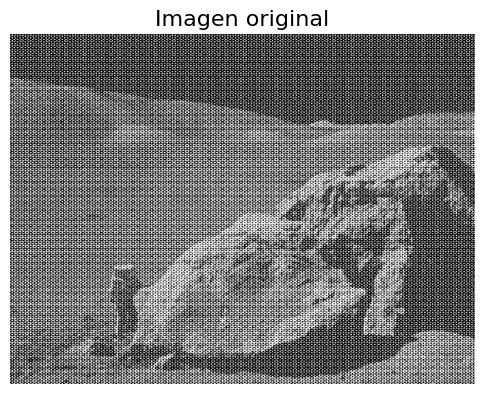

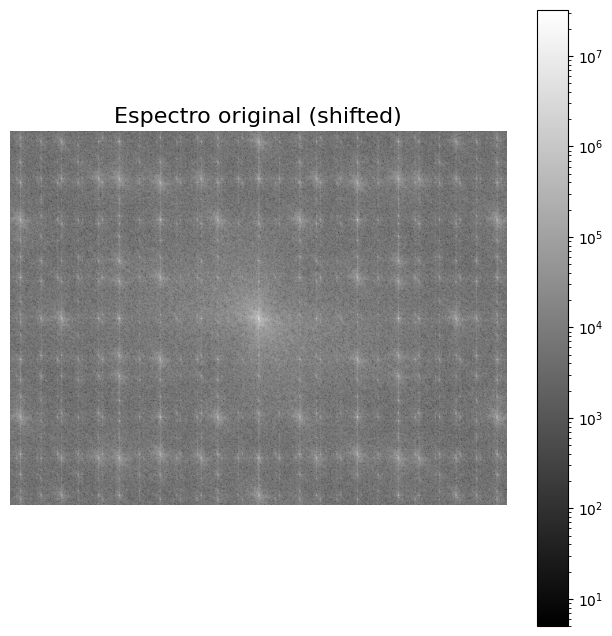

In [4]:
# Cargar en flotante (0–1)
img_path = os.path.join(IMAGE_DIR, IMAGE_FILE)
im = imread(img_path).astype(float)
print(f"Dimensiones: {im.shape}, Intensidad min/max: {im.min():.3f}/{im.max():.3f}")

# Visualizar original
plt.figure(figsize=(6,6))
plt.imshow(im, cmap='gray')
plt.title('Imagen original', size=16)
plt.axis('off')
plt.show()

# FFT
im_fft = fftpack.fft2(im)
plot_spectrum(fftpack.fftshift(im_fft), title='Espectro original (shifted)')

## 5. Filtrado morfológico en el espectro

/tmp/ipython-input-3-2551210039.py:46: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  eroded = erosion(magnitude, rectangle(*erode_size))
/tmp/ipython-input-3-2551210039.py:47: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  dilated = dilation(eroded, rectangle(*dilate_size))


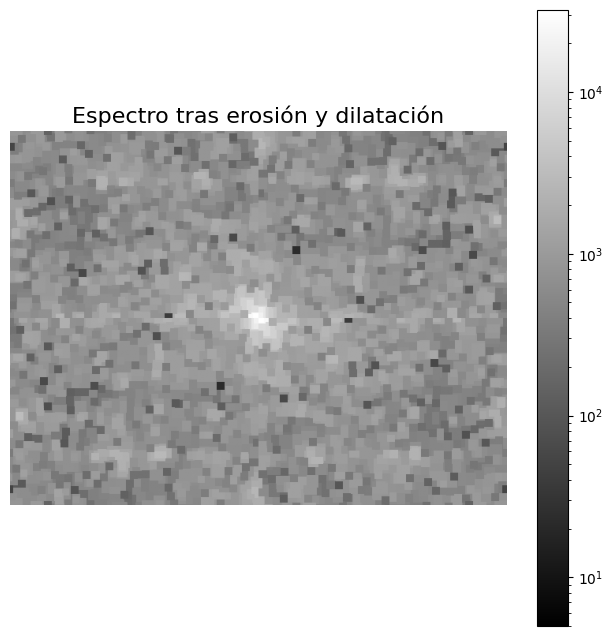

In [5]:
# Separar magnitud y fase
mag = np.abs(im_fft)
phase = np.angle(im_fft)

# Aplicar erosión y dilatación
mag_filt = morphological_filter(mag,
                                erode_size=(18,18),
                                dilate_size=(9,9))
plot_spectrum(fftpack.fftshift(mag_filt * np.exp(1j*phase)),
              title='Espectro tras erosión y dilatación')


## 7. Reconstrucción de la imagen filtrada

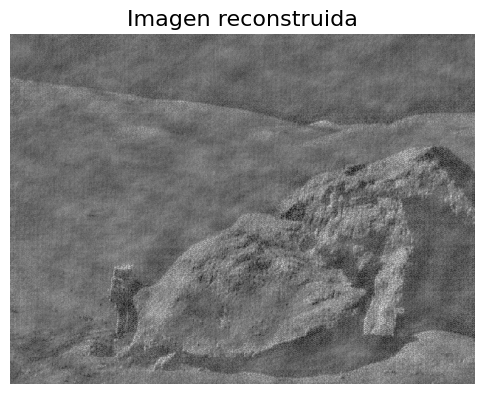

In [6]:
# Reconstruir FFT complejo y aplicar inversa
filtered_fft = mag_filt * np.exp(1j * phase)
recon = fftpack.ifft2(filtered_fft).real

# Mostrar reconstrucción
plt.figure(figsize=(6,6))
plt.imshow(recon, cmap='gray')
plt.title('Imagen reconstruida', size=16)
plt.axis('off')
plt.show()

### Notas y ajustes
- **Parametrización**: modifica `erode_size` y `dilate_size` para ajustar el grado de filtrado.  